In [1]:
import os
import pickle
import numpy as np
import torch
import random
import tqdm

In [2]:
import matplotlib              as mpl
import matplotlib.pyplot       as plt
import matplotlib.colors       as mcolors
import matplotlib.patches      as mpatches
import matplotlib.transforms   as mtransforms
import matplotlib.font_manager as font_manager
%matplotlib inline

In [3]:
from behenate_net.aug import PadBottomRight, \
                             Pad,            \
                             Crop,           \
                             RandomCrop,     \
                             Resize,         \
                             RandomShift,    \
                             RandomRotate,   \
                             RandomPatch,    \
                             RandomCenterCropZoom

In [4]:
from behenate_net.dataset   import BeHenateDataset
from behenate_net.model     import ConfigModel, BeHenataNet
from behenate_net.utils     import split_dataset, set_seed

In [5]:
seed = 0
set_seed(seed)

In [6]:
batch_size = 100
lr = 1e-3
frac_train = 0.8
frac_validate = 0.5

In [7]:
path_pickle = "beam_center.pickle"
with open(path_pickle, 'rb') as handle:
    data_list = pickle.load(handle)

# Split data...
data_train   , data_val_and_test = split_dataset(data_list        , frac_train   , seed = None)
data_validate, data_test         = split_dataset(data_val_and_test, frac_validate, seed = None)

In [101]:
size_sample = 4000
normalizes_data = True
size_img_y, size_img_x = (200, 200)

size_pad       = 2000
size_patch     = 10
frac_shift_max = 0.4
angle_max      = 20

trans_list = ( 
    Pad(size_y = size_pad, size_x = size_pad),
    Resize(size_img_y, size_img_x),
    RandomRotate(angle_max = angle_max),
    RandomShift(frac_shift_max, frac_shift_max),
    RandomCenterCropZoom(trim_factor_max = 0.2),
    RandomPatch(num_patch = 20, size_patch_y = size_patch, size_patch_x = size_patch, var_patch_y = 0.2, var_patch_x = 0.2),
)

dataset_train = BeHenateDataset( data_list          = data_train,
                                 size_sample        = size_sample,
                                 trans_list         = trans_list,
                                 normalizes_data    = normalizes_data,
                                 prints_cache_state = False,
                               )
# dataset_train.cache_dataset()

dataset_validate = BeHenateDataset( data_list       = data_validate,
                                    size_sample     = size_sample // 2,
                                    trans_list      = trans_list,
                                    normalizes_data = normalizes_data,
                                    prints_cache_state = False,
                                  )
# dataset_validate.cache_dataset()

Text(0.5, 1.0, '(200, 200), (188.6207385882353, 170.64152505882353)')

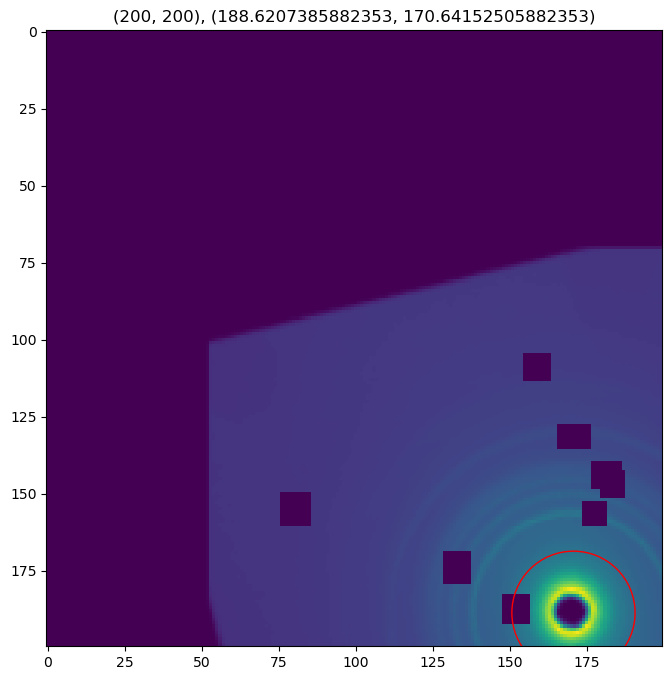

In [113]:
img, center, metadata = dataset_train[0]
img = img[0]

radius = 20
fig = plt.figure(figsize = (8, 8))
circle      = mpatches.Circle(center[::-1], radius=radius, color='red', fill=False)    # Err..., matplotlib uses (x, y) not (y, x)

vmin = np.nanmedian(img)
vmax = np.nanmedian(img) + 8 * np.nanstd(img)
plt.imshow(img, vmin = vmin, vmax = vmax)
plt.gca().add_patch(circle)
plt.title(f"{img.shape}, {center}")

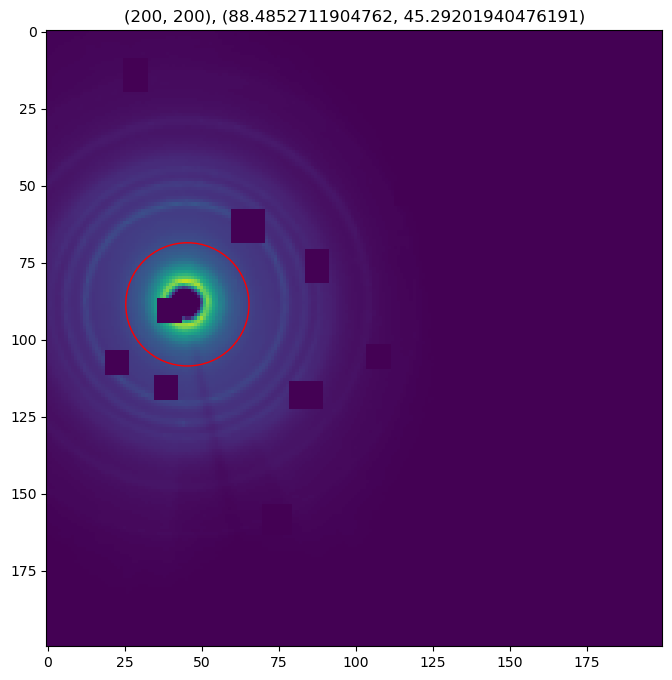

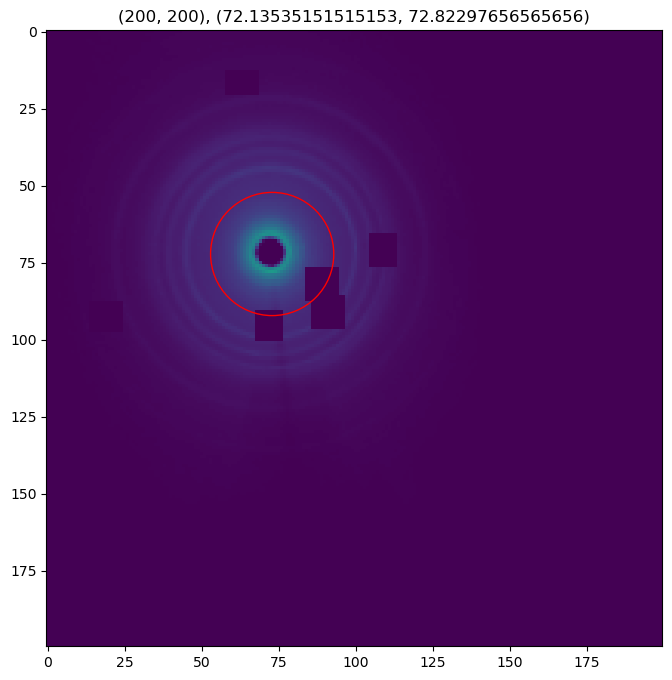

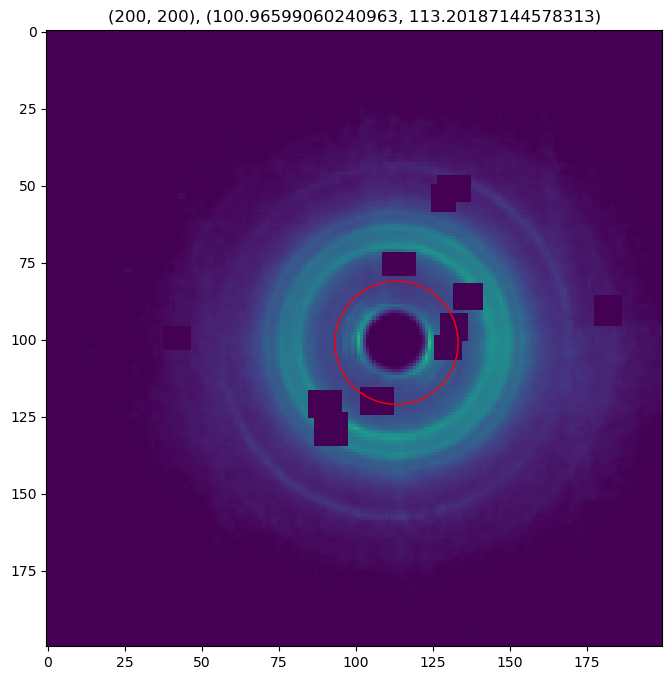

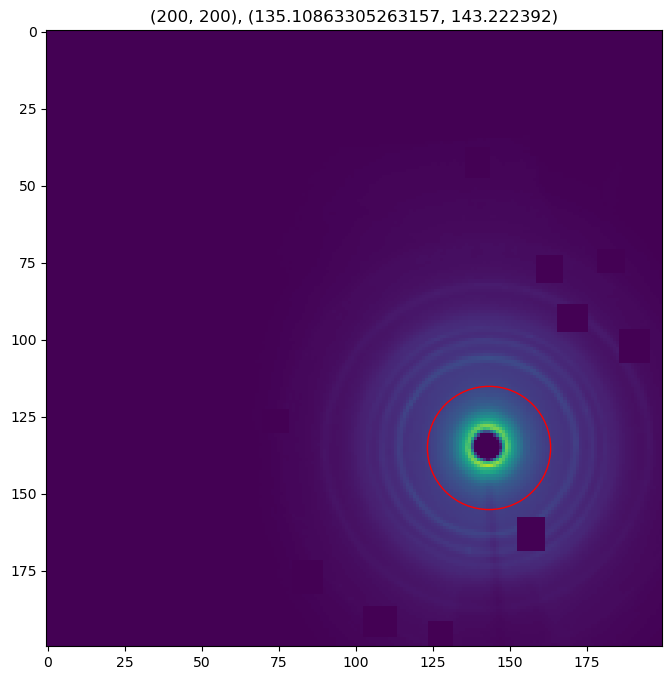

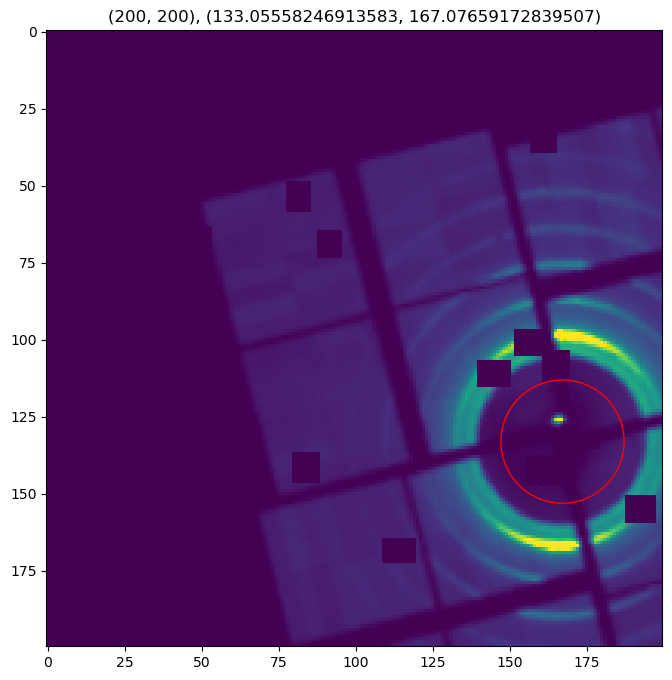

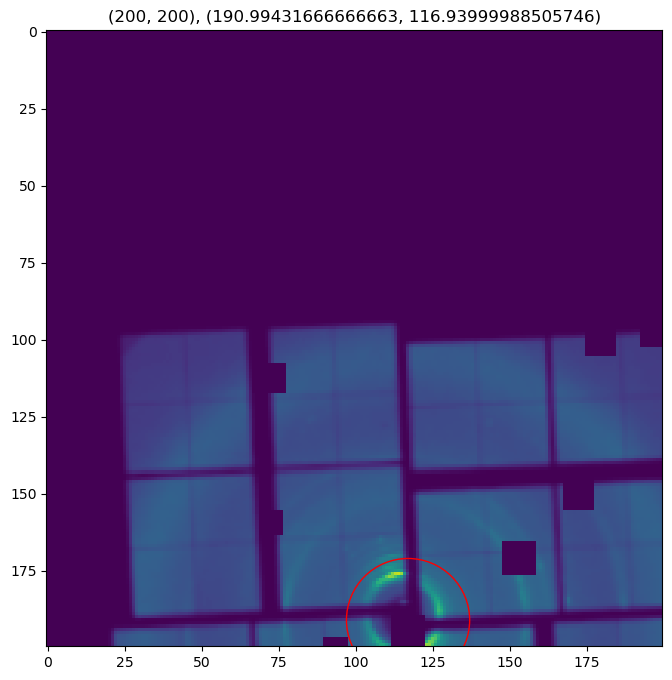

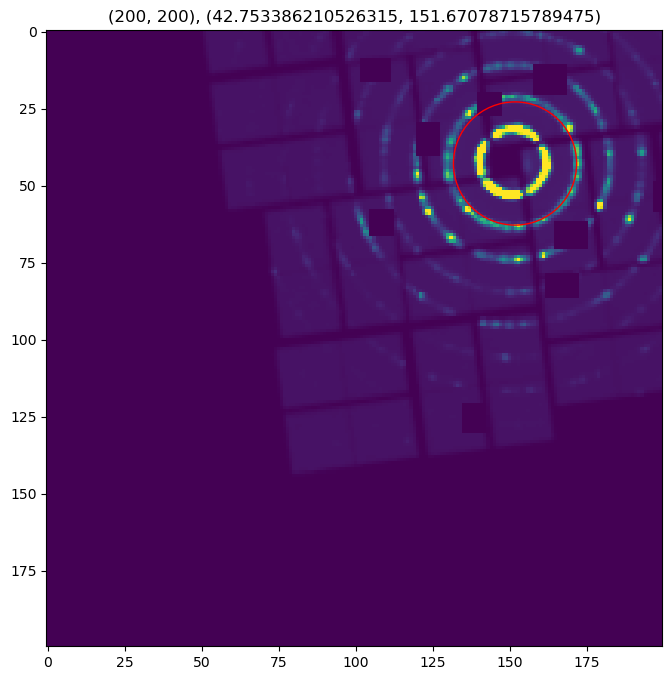

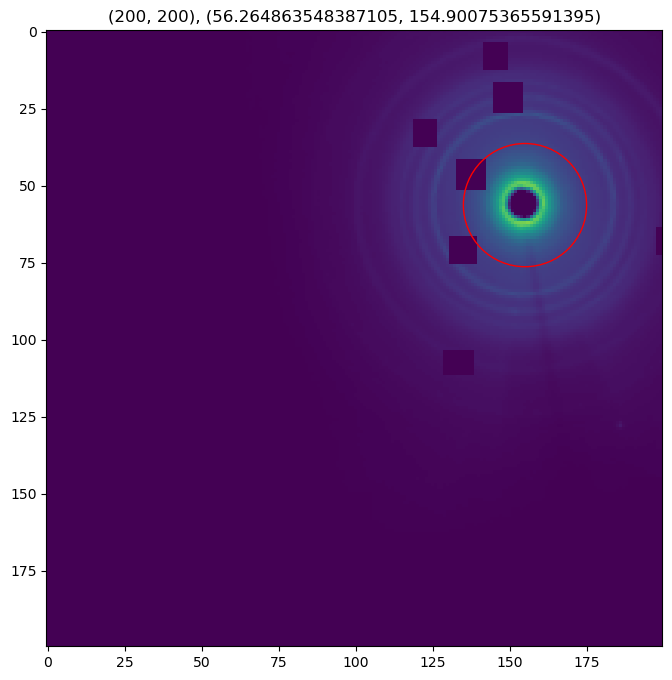

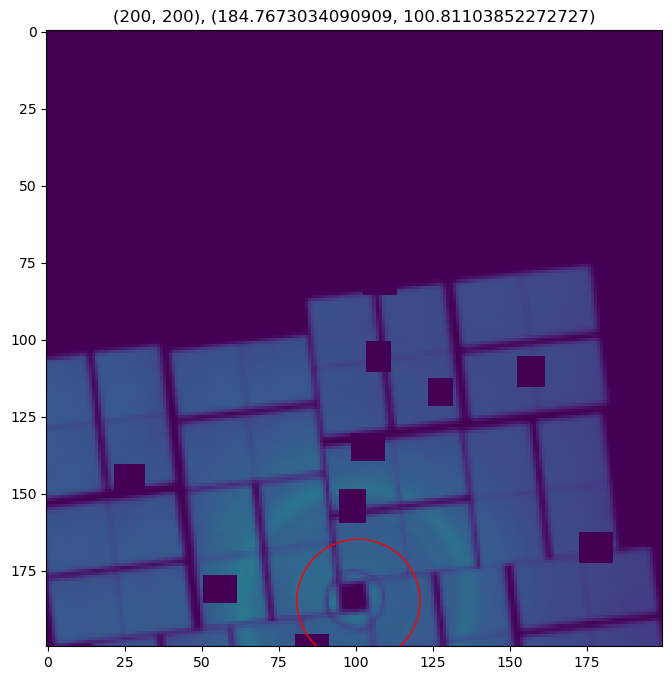

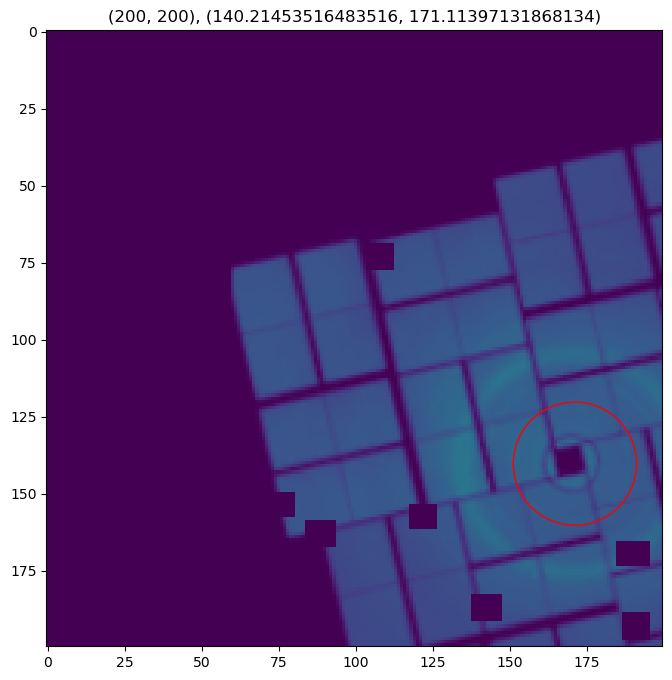

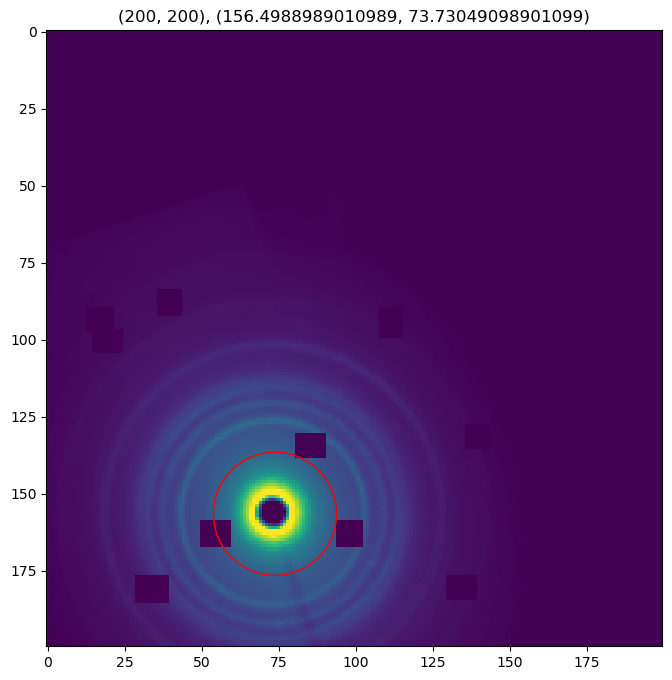

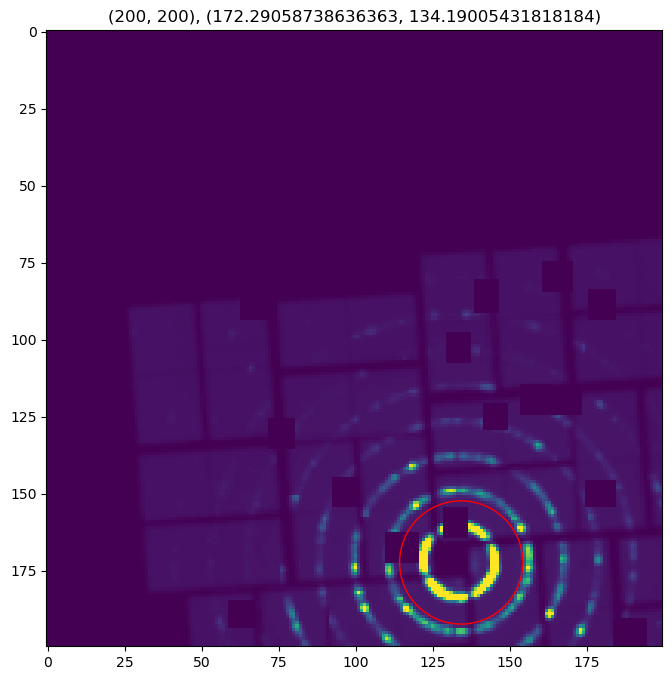

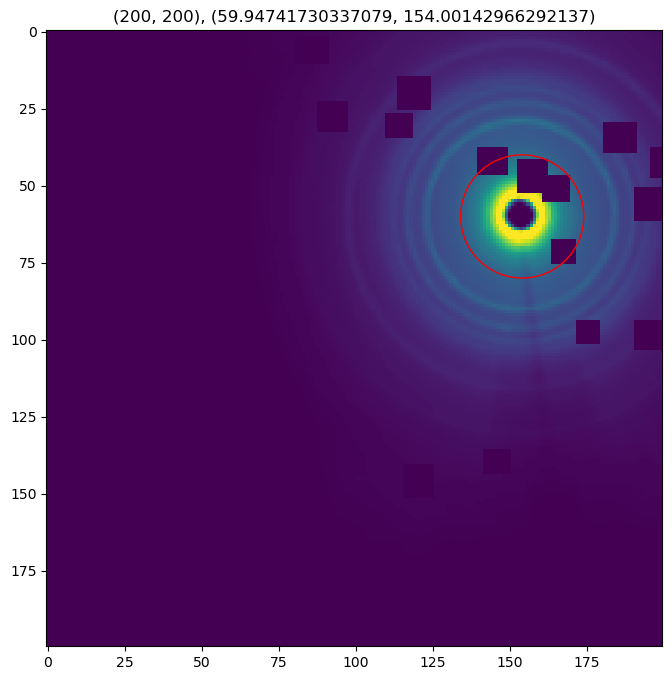

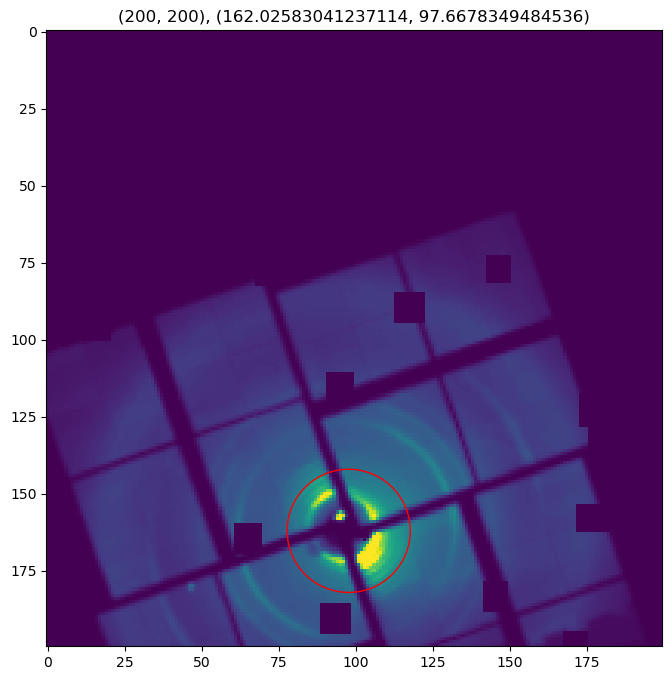

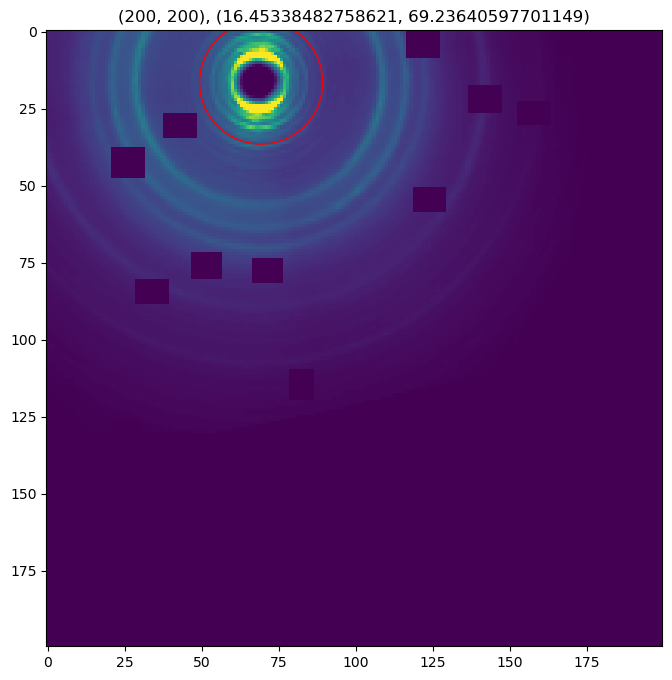

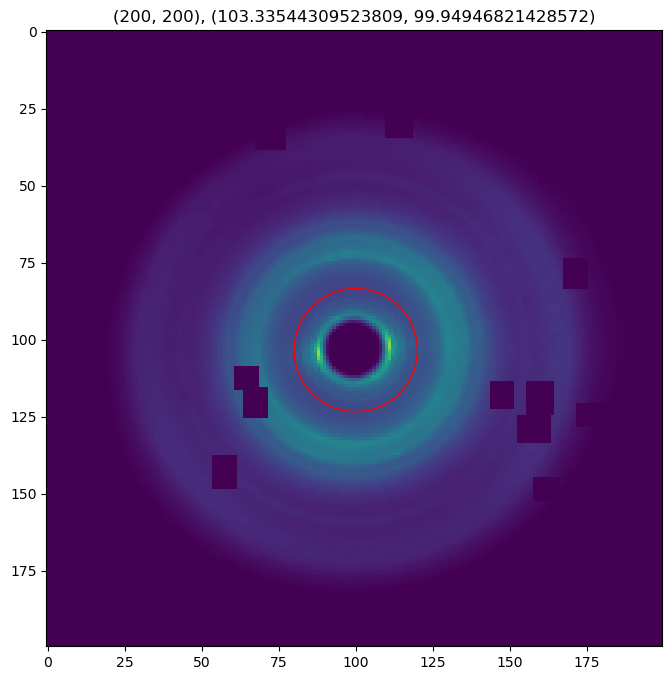

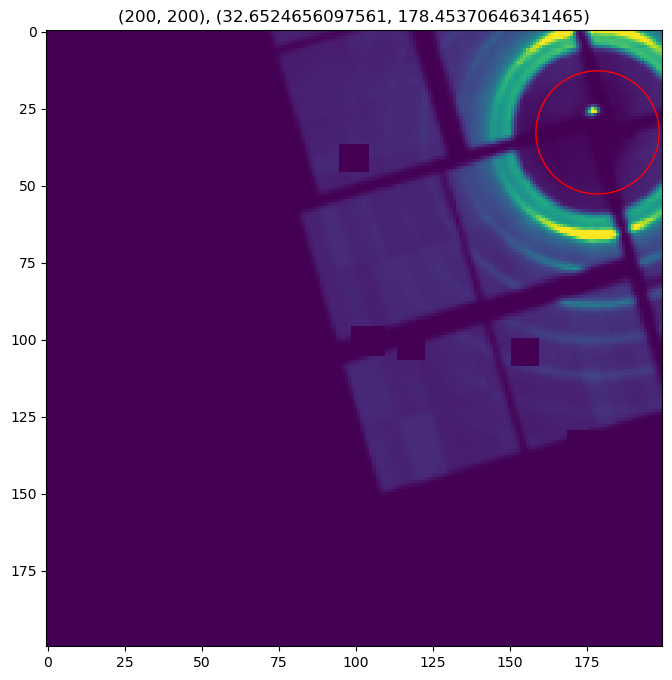

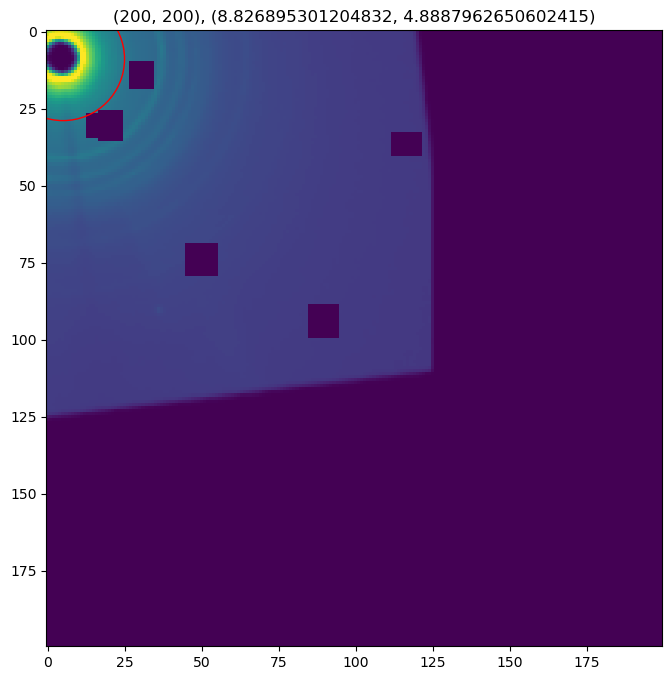

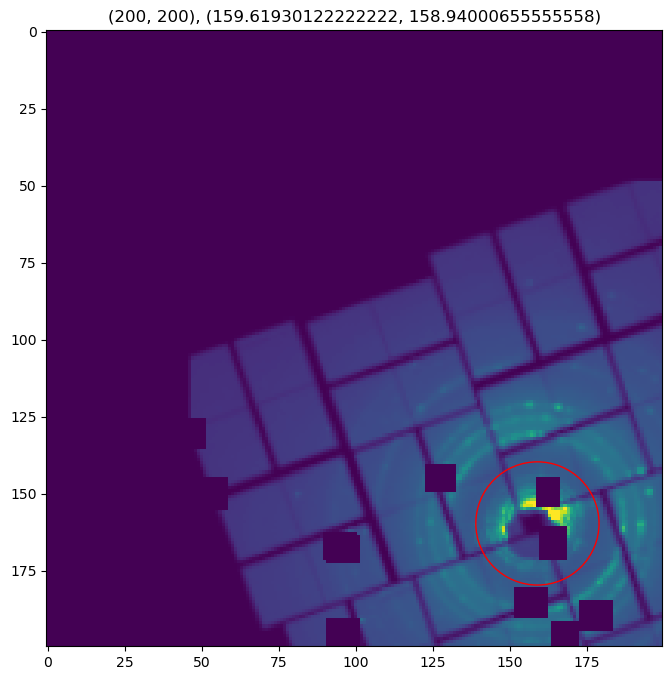

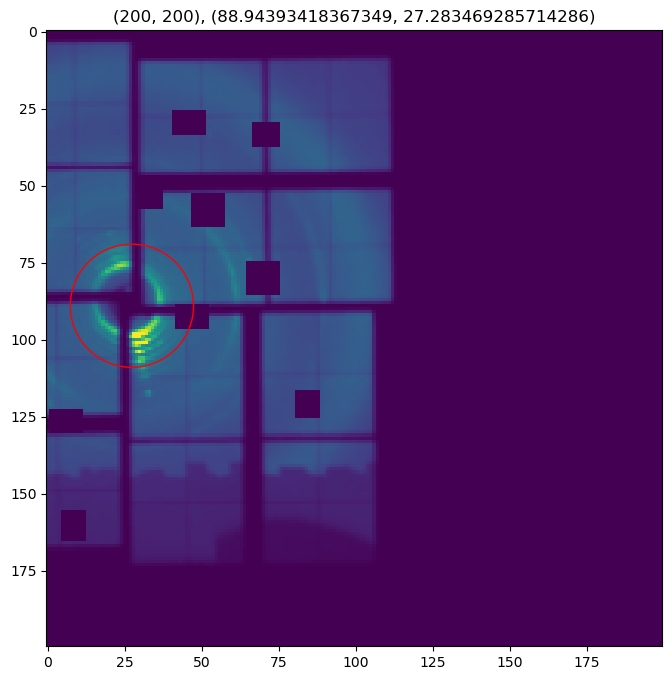

In [114]:
radius = 20
for idx in range(20):
    img, center, metadata = dataset_train[idx]
    img = img[0]

    fig = plt.figure(figsize = (8, 8))
    circle      = mpatches.Circle(center[::-1], radius=radius, color='red', fill=False)    # Err..., matplotlib uses (x, y) not (y, x)

    vmin = np.nanmedian(img)
    vmax = np.nanmedian(img) + 8 * np.nanstd(img)
    plt.imshow(img, vmin = vmin, vmax = vmax)
    plt.gca().add_patch(circle)
    plt.title(f"{img.shape}, {center}")